In [50]:
from keras.applications import MobileNet
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import image


from keras.optimizers import Adam
from keras.preprocessing import image


In [51]:
img_rows, img_cols = 224, 224

# Re-loads the MobileNet model without the top or Fully connected layers
MobileNet = MobileNet(weights = 'imagenet', include_top = False, input_shape = (img_rows,img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in MobileNet.layers:
    layer.trainable = False
    
for (i,layer) in enumerate(MobileNet.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 ZeroPadding2D False
2 Conv2D False
3 BatchNormalization False
4 ReLU False
5 DepthwiseConv2D False
6 BatchNormalization False
7 ReLU False
8 Conv2D False
9 BatchNormalization False
10 ReLU False
11 ZeroPadding2D False
12 DepthwiseConv2D False
13 BatchNormalization False
14 ReLU False
15 Conv2D False
16 BatchNormalization False
17 ReLU False
18 DepthwiseConv2D False
19 BatchNormalization False
20 ReLU False
21 Conv2D False
22 BatchNormalization False
23 ReLU False
24 ZeroPadding2D False
25 DepthwiseConv2D False
26 BatchNormalization False
27 ReLU False
28 Conv2D False
29 BatchNormalization False
30 ReLU False
31 DepthwiseConv2D False
32 BatchNormalization False
33 ReLU False
34 Conv2D False
35 BatchNormalization False
36 ReLU False
37 ZeroPadding2D False
38 DepthwiseConv2D False
39 BatchNormalization False
40 ReLU False
41 Conv2D False
42 BatchNormalization False
43 ReLU False
44 DepthwiseConv2D False
45 BatchNormalization False
46 ReLU False
47 Conv2D False
48 Batc

In [52]:
def addLayers(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    new_model = bottom_model.output
    new_model = GlobalAveragePooling2D()(new_model)
    new_model = Dense(1024,activation='relu')(new_model)
    new_model = Dense(1024,activation='relu')(new_model)
    new_model = Dense(512,activation='relu')(new_model)
    new_model = Dense(num_classes,activation='softmax')(new_model)
    return new_model

In [53]:
num_classes = 2

FCL = addLayers(MobileNet, num_classes)

model = Model(inputs = MobileNet.input, outputs = FCL)

print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [54]:
train_data_dir = 'dataset/train/'
validation_data_dir = 'dataset/validation/'

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=0.3, height_shift_range=0.3,
                                   horizontal_flip=True, fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
batch_size = 64
 
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_rows, img_cols), batch_size=batch_size,
                                                    class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size=(img_rows, img_cols),
                                                              batch_size=batch_size, class_mode='categorical')

Found 1200 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [56]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [57]:
nb_train_samples = 1200
nb_validation_samples = 120

epochs = 20
batch_size = 64

history = model.fit(train_generator, steps_per_epoch = nb_train_samples // batch_size, epochs = epochs,
                             validation_data = validation_generator,
                              validation_steps = nb_validation_samples // batch_size)

'''model.fit(
        train_generator,
        steps_per_epoch=5,
        epochs = 10,
        validation_data=validation_generator,
        validation_steps=1)'''

Epoch 1/20
18/18 [==============================] - 96s 5s/step - loss: 0.4798 - accuracy: 0.8486 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 2/20
18/18 [==============================] - 94s 5s/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 1.1401e-04 - val_accuracy: 1.0000
Epoch 3/20
18/18 [==============================] - 98s 5s/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 3.8322e-04 - val_accuracy: 1.0000
Epoch 4/20
18/18 [==============================] - 93s 5s/step - loss: 0.0053 - accuracy: 0.9982 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 5/20
18/18 [==============================] - 96s 5s/step - loss: 0.0059 - accuracy: 0.9974 - val_loss: 1.8483e-04 - val_accuracy: 1.0000
Epoch 6/20
18/18 [==============================] - 99s 5s/step - loss: 8.0713e-04 - accuracy: 1.0000 - val_loss: 3.7941e-04 - val_accuracy: 1.0000
Epoch 7/20
18/18 [==============================] - 94s 5s/step - loss: 4.3925e-04 - accuracy: 1.0000 - val_loss: 6.0917e-05 - val_accuracy:

'model.fit(\n        train_generator,\n        steps_per_epoch=5,\n        epochs = 10,\n        validation_data=validation_generator,\n        validation_steps=1)'

In [58]:
model.save('mera_model.h5')

In [59]:
from keras.models import load_model

In [60]:
m = load_model('mera_model.h5')

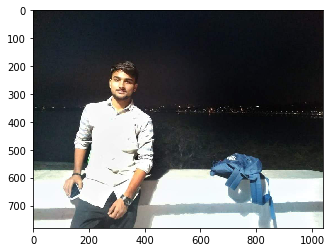

(780, 1040, 3)

In [106]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('dataset/Prediction/rishabh2.jpg')
imgplot = plt.imshow(img)
plt.show()
img.shape

In [107]:
test_image = image.load_img('dataset/Prediction/rishabh2.jpg',target_size=(224,224))

In [108]:
test_image = image.img_to_array(test_image)
type(test_image)
test_image.shape

(224, 224, 3)

In [109]:
import numpy as np
test_image = np.expand_dims(test_image, axis=0)

In [110]:
r = train_generator.class_indices
r

{'Rajat': 0, 'Rishabh': 1}

In [111]:
result = m.predict(test_image)
if result[0][0] >= 0.5:
    print('Rajat')
else:
    print('Rishabh')


Rishabh


array([[2.0395562e-05, 9.9997962e-01]], dtype=float32)